
#**PRACTICE #1**: Introduction and linear regression 

In [8]:
# Import required python packages (libraries)
import pandas as pd              # Data I/O, analysis, and manipulation
import numpy as np               # Scientific calculations 
import matplotlib.pyplot as plt  # Visualization

---
## 1. Download and preprocess data

In [9]:
# Download the Daily Sea Ice Extent Data Files for the Northern hemisphere from NSIDC
!wget https://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv

--2021-10-12 07:10:18--  https://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv
Resolving masie_web.apps.nsidc.org (masie_web.apps.nsidc.org)... 128.138.135.43
Connecting to masie_web.apps.nsidc.org (masie_web.apps.nsidc.org)|128.138.135.43|:443... connected.
HTTP request sent, awaiting response... ^C


<table><tr>
<td> <img src="https://masie_web.apps.nsidc.org/pub//DATASETS/NOAA/G02135/north/monthly/images/09_Sep/N_197909_extn_v3.0.png" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://masie_web.apps.nsidc.org/pub/DATASETS/NOAA/G02135/north/monthly/images/09_Sep/N_202109_extn_v3.0.png" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

In [10]:
# Path to the dataset file
dataset_src = '/content/drive/MyDrive/ml_test/N_seaice_extent_daily_v3.0.csv'

# Import the csv dataset as pandas Dataframe
sea_ice_daily = pd.read_csv(
    dataset_src,                                # 'path/to/the/dataset.csv'
    sep=',',                                    # Delimiter to use
    skipinitialspace=True,                      # Skip spaces after delimiter      
    header=0,                                   # Row number(s) to use as the column names
    skiprows=[1],                               # Line numbers to skip (0-indexed)
    usecols=['Year', 'Month', 'Day', 'Extent'], # Return a subset of the columns
    dtype={'Year': int, 'Month': int, 
           'Day': int, 'Extent': float}         # Data type for data in columns
)                
# Display first 10 rows in the daily dataset
sea_ice_daily.head(10)

,Year,Month,Day,Extent
0,1978,10,26,10.231
1,1978,10,28,10.420
2,1978,10,30,10.557
3,1978,11,1,10.670
4,1978,11,3,10.777
5,1978,11,5,10.968
6,1978,11,7,11.080
7,1978,11,9,11.189
8,1978,11,11,11.314
9,1978,11,13,11.460


In [11]:
# Create annual mean dataset of the sea ice extent from the daily data
sea_ice_annual = sea_ice_daily.groupby(sea_ice_daily.Year, as_index=False)['Extent'].mean()
# Display first 10 rows in the daily dataset
sea_ice_annual.head(10)

,Year,Extent
0,1978,12.487000
1,1979,12.319560
2,1980,12.334148
3,1981,12.135486
4,1982,12.439445
5,1983,12.335896
6,1984,11.912601
7,1985,11.986599
8,1986,12.208224
9,1987,11.397227



---

## 2. Plot the data

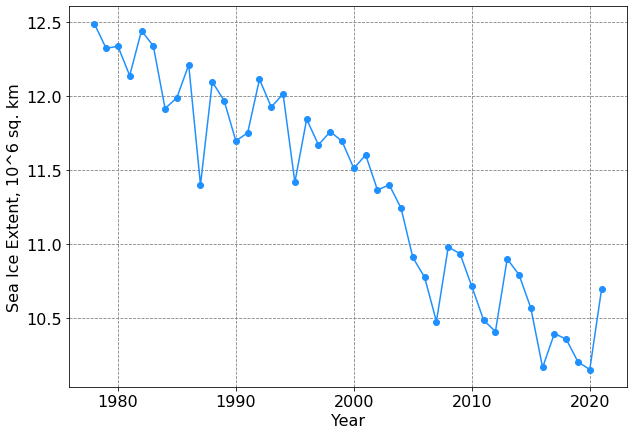

In [12]:
# Plot the dataset
# Set the figure params
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.tick_params(labelsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Sea Ice Extent, 10^6 sq. km', fontsize=16)
ax.grid(ls='--', color='grey')
# Plot data 
ax.plot(
    sea_ice_annual.Year.values,
    sea_ice_annual.Extent.values,
    c='dodgerblue', marker='o'
)
plt.show()



---
## 3. Linear regression model: $\hat y=\theta_1 X + \theta_0$
* ### Model training using matrix multiplications: $\theta=(X^T X)^{-1} X^T y$

In [27]:
# Define X & Y 
x = np.vstack((np.ones(len(sea_ice_annual)), sea_ice_annual.index)).T
y = sea_ice_annual.Extent
# Model training implemented using NumPy 
theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)    
# Print model coefficients 
print(theta)

[12.50220867 -0.05247217]


In [28]:
# predict using coefficients
sea_ice_extent_hat = x.dot(theta)

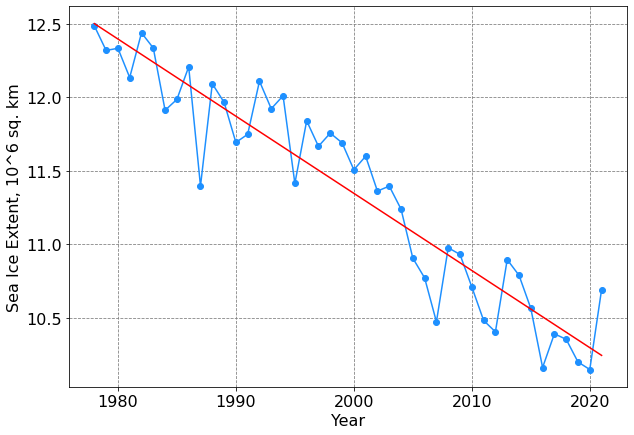

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.tick_params(labelsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Sea Ice Extent, 10^6 sq. km', fontsize=16)

ax.plot(
    sea_ice_annual.Year.values,
    sea_ice_annual.Extent.values,
    c='dodgerblue', marker='o'
)
ax.plot(sea_ice_annual.Year.values, 
        sea_ice_extent_hat,
        c='red')

ax.grid(ls='--', color='grey')
plt.show()


---
## 4. Using Scikit-Learn pacakge

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regression = LinearRegression()
# Fit the linear regression model
linear_model = regression.fit(
    sea_ice_annual.index[:,np.newaxis],
    sea_ice_annual.Extent)
# Print the model params
print(linear_model.intercept_, linear_model.coef_)

12.502208671811216 [-0.05247217]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
